In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import category_encoders as ce
import os

## Import data

In [2]:
df = pd.read_excel('data/wifi.xlsx', sheet_name='Main data')
df = df[['ssid', 'mackonversi', 'rssi', 'lokasi']]
df

,ssid,mackonversi,rssi,lokasi
0,KRAI,273146522812986,-86,Perpustakaan D4
1,eepisMobile,264428361941459,-85,Perpustakaan D4
2,eepiswlan,211266695032288,-88,Perpustakaan D4
3,eepisGuest,264428361175954,-62,Perpustakaan D4
4,eepisGuest,211266695032290,-87,Perpustakaan D4
...,...,...,...,...
2239,eepisGuest,220077978544770,-82,Perpustakaan Pasca
2240,Lab Emerge _ WSC,158746488395693,-80,Perpustakaan Pasca
2241,senatGuest,113506318785,-76,Perpustakaan Pasca
2242,ZTE_2.4G_YYsFKz,57330268306608,-87,Perpustakaan Pasca


## Preprocessing

In [3]:
le_ssid = LabelEncoder()
le_lokasi = LabelEncoder()

df['ssid_encoded'] = le_ssid.fit_transform(df['ssid'])
df['lokasi_encoded'] = le_lokasi.fit_transform(df['lokasi'])

In [4]:
df

,ssid,mackonversi,rssi,lokasi,ssid_encoded,lokasi_encoded
0,KRAI,273146522812986,-86,Perpustakaan D4,65,6
1,eepisMobile,264428361941459,-85,Perpustakaan D4,148,6
2,eepiswlan,211266695032288,-88,Perpustakaan D4,149,6
3,eepisGuest,264428361175954,-62,Perpustakaan D4,147,6
4,eepisGuest,211266695032290,-87,Perpustakaan D4,147,6
...,...,...,...,...,...,...
2239,eepisGuest,220077978544770,-82,Perpustakaan Pasca,147,7
2240,Lab Emerge _ WSC,158746488395693,-80,Perpustakaan Pasca,79,7
2241,senatGuest,113506318785,-76,Perpustakaan Pasca,166,7
2242,ZTE_2.4G_YYsFKz,57330268306608,-87,Perpustakaan Pasca,134,7


In [5]:
# df = df[df['lokasi_encoded'].isin([1, 2, 3])]

## One-hot encoder ('mackonversi')

In [6]:
mackonversi_encoded = pd.get_dummies(df['mackonversi'], prefix='mac')

In [7]:
df

,ssid,mackonversi,rssi,lokasi,ssid_encoded,lokasi_encoded
0,KRAI,273146522812986,-86,Perpustakaan D4,65,6
1,eepisMobile,264428361941459,-85,Perpustakaan D4,148,6
2,eepiswlan,211266695032288,-88,Perpustakaan D4,149,6
3,eepisGuest,264428361175954,-62,Perpustakaan D4,147,6
4,eepisGuest,211266695032290,-87,Perpustakaan D4,147,6
...,...,...,...,...,...,...
2239,eepisGuest,220077978544770,-82,Perpustakaan Pasca,147,7
2240,Lab Emerge _ WSC,158746488395693,-80,Perpustakaan Pasca,79,7
2241,senatGuest,113506318785,-76,Perpustakaan Pasca,166,7
2242,ZTE_2.4G_YYsFKz,57330268306608,-87,Perpustakaan Pasca,134,7


In [8]:
print("\nMapping lokasi:")
for label, code in zip(le_lokasi.classes_, le_lokasi.transform(le_lokasi.classes_)):
    print(f"{label} -> {code}")


Mapping lokasi:
Cafetaria Pasca -> 0
Kantin D3 -> 1
Kantin Pasca -> 2
Lab E204 D4 -> 3
Musholla D4 -> 4
Musholla Saw -> 5
Perpustakaan D4 -> 6
Perpustakaan Pasca -> 7
Saw 0808 -> 8
Sekber D4 -> 9


In [9]:
df

,ssid,mackonversi,rssi,lokasi,ssid_encoded,lokasi_encoded
0,KRAI,273146522812986,-86,Perpustakaan D4,65,6
1,eepisMobile,264428361941459,-85,Perpustakaan D4,148,6
2,eepiswlan,211266695032288,-88,Perpustakaan D4,149,6
3,eepisGuest,264428361175954,-62,Perpustakaan D4,147,6
4,eepisGuest,211266695032290,-87,Perpustakaan D4,147,6
...,...,...,...,...,...,...
2239,eepisGuest,220077978544770,-82,Perpustakaan Pasca,147,7
2240,Lab Emerge _ WSC,158746488395693,-80,Perpustakaan Pasca,79,7
2241,senatGuest,113506318785,-76,Perpustakaan Pasca,166,7
2242,ZTE_2.4G_YYsFKz,57330268306608,-87,Perpustakaan Pasca,134,7


## Visualization

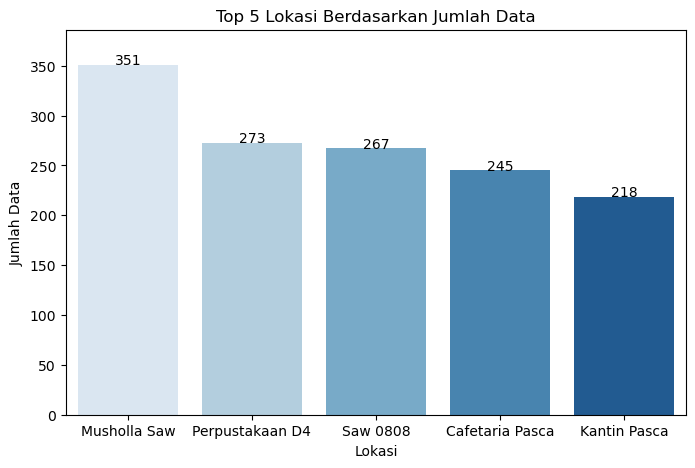

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ambil top 5 lokasi berdasarkan jumlah data
top5_lokasi = df['lokasi'].value_counts().nlargest(5).reset_index()
top5_lokasi.columns = ['lokasi', 'jumlah']

plt.figure(figsize=(8,5))
barplot = sns.barplot(data=top5_lokasi, x='lokasi', y='jumlah', palette='Blues')

# Tambahkan angka di atas batang
for index, row in top5_lokasi.iterrows():
    barplot.text(index, row.jumlah + 0.5,  # posisi teks: sedikit di atas batang
                 round(row.jumlah, 0), 
                 color='black', ha="center")

plt.title('Top 5 Lokasi Berdasarkan Jumlah Data')
plt.xlabel('Lokasi')
plt.ylabel('Jumlah Data')
plt.ylim(0, top5_lokasi['jumlah'].max() * 1.1)  # sedikit spasi atas batang
plt.show()

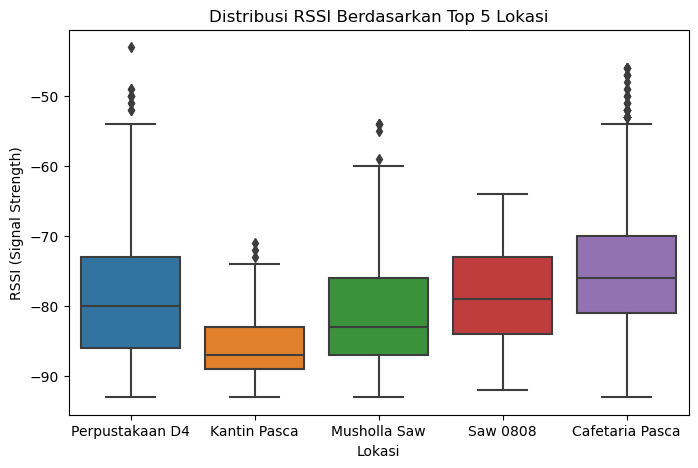

In [11]:
# Cari top 5 lokasi berdasarkan frekuensi kemunculan
top5_lokasi = df['lokasi'].value_counts().nlargest(5).index

# Filter dataframe hanya untuk lokasi top 5
df_top5 = df[df['lokasi'].isin(top5_lokasi)]

# Plot boxplot untuk top 5 lokasi
plt.figure(figsize=(8,5))
sns.boxplot(data=df_top5, x='lokasi', y='rssi')
plt.title('Distribusi RSSI Berdasarkan Top 5 Lokasi')
plt.xlabel('Lokasi')
plt.ylabel('RSSI (Signal Strength)')
plt.show()

## Spliting Data

In [12]:
df

,ssid,mackonversi,rssi,lokasi,ssid_encoded,lokasi_encoded
0,KRAI,273146522812986,-86,Perpustakaan D4,65,6
1,eepisMobile,264428361941459,-85,Perpustakaan D4,148,6
2,eepiswlan,211266695032288,-88,Perpustakaan D4,149,6
3,eepisGuest,264428361175954,-62,Perpustakaan D4,147,6
4,eepisGuest,211266695032290,-87,Perpustakaan D4,147,6
...,...,...,...,...,...,...
2239,eepisGuest,220077978544770,-82,Perpustakaan Pasca,147,7
2240,Lab Emerge _ WSC,158746488395693,-80,Perpustakaan Pasca,79,7
2241,senatGuest,113506318785,-76,Perpustakaan Pasca,166,7
2242,ZTE_2.4G_YYsFKz,57330268306608,-87,Perpustakaan Pasca,134,7


In [13]:
# Gabungkan hasil encoding dengan fitur lain
X = pd.concat([mackonversi_encoded, df[['ssid_encoded', 'rssi']]], axis=1)
y = df['lokasi_encoded']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

## Training Model (SVM, NBC, RandomForest, KNN)

In [15]:
### ===== 1. SVM =====
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf'],
    'max_iter': [1000, 5000, 10000],
    'class_weight': [None, 'balanced']
}
svc = SVC()
grid_svc = GridSearchCV(svc, param_grid_svm, refit=True, verbose=3, cv=5, return_train_score=True)
grid_svc.fit(x_train, y_train)
joblib.dump(grid_svc, 'models/model_svm.pkl')
akurasi_SVM = round(accuracy_score(y_test, grid_svc.predict(x_test)) * 100, 2)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END C=0.1, class_weight=None, gamma=1, kernel=rbf, max_iter=1000;, score=(train=0.167, test=0.169) total time=   0.2s
[CV 2/5] END C=0.1, class_weight=None, gamma=1, kernel=rbf, max_iter=1000;, score=(train=0.168, test=0.166) total time=   0.2s
[CV 3/5] END C=0.1, class_weight=None, gamma=1, kernel=rbf, max_iter=1000;, score=(train=0.168, test=0.166) total time=   0.2s
[CV 4/5] END C=0.1, class_weight=None, gamma=1, kernel=rbf, max_iter=1000;, score=(train=0.167, test=0.169) total time=   0.2s
[CV 5/5] END C=0.1, class_weight=None, gamma=1, kernel=rbf, max_iter=1000;, score=(train=0.167, test=0.169) total time=   0.2s
[CV 1/5] END C=0.1, class_weight=None, gamma=1, kernel=rbf, max_iter=5000;, score=(train=0.167, test=0.169) total time=   0.2s
[CV 2/5] END C=0.1, class_weight=None, gamma=1, kernel=rbf, max_iter=5000;, score=(train=0.168, test=0.166) total time=   0.3s
[CV 3/5] END C=0.1, class_weight=None, gamma=1, 

c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=1, class_weight=None, gamma=0.01, kernel=rbf, max_iter=1000;, score=(train=0.427, test=0.334) total time=   0.1s
[CV 2/5] END C=1, class_weight=None, gamma=0.01, kernel=rbf, max_iter=1000;, score=(train=0.428, test=0.344) total time=   0.1s
[CV 3/5] END C=1, class_weight=None, gamma=0.01, kernel=rbf, max_iter=1000;, score=(train=0.412, test=0.344) total time=   0.1s
[CV 4/5] END C=1, class_weight=None, gamma=0.01, kernel=rbf, max_iter=1000;, score=(train=0.405, test=0.376) total time=   0.1s
[CV 5/5] END C=1, class_weight=None, gamma=0.01, kernel=rbf, max_iter=1000;, score=(train=0.421, test=0.334) total time=   0.1s
[CV 1/5] END C=1, class_weight=None, gamma=0.01, kernel=rbf, max_iter=5000;, score=(train=0.427, test=0.334) total time=   0.1s
[CV 2/5] END C=1, class_weight=None, gamma=0.01, kernel=rbf, max_iter=5000;, score=(train=0.428, test=0.344) total time=   0.1s
[CV 3/5] END C=1, class_weight=None, gamma=0.01, kernel=rbf, max_iter=5000;, score=(train=0.412, test=0.

c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, gamma=0.1, kernel=rbf, max_iter=1000;, score=(train=0.967, test=0.656) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, gamma=0.1, kernel=rbf, max_iter=1000;, score=(train=0.959, test=0.634) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, gamma=0.1, kernel=rbf, max_iter=1000;, score=(train=0.963, test=0.653) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, gamma=0.1, kernel=rbf, max_iter=1000;, score=(train=0.959, test=0.701) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, gamma=0.1, kernel=rbf, max_iter=1000;, score=(train=0.961, test=0.646) total time=   0.2s
[CV 1/5] END C=10, class_weight=None, gamma=0.1, kernel=rbf, max_iter=5000;, score=(train=0.967, test=0.656) total time=   0.2s
[CV 2/5] END C=10, class_weight=None, gamma=0.1, kernel=rbf, max_iter=5000;, score=(train=0.959, test=0.634) total time=   0.2s
[CV 3/5] END C=10, class_weight=None, gamma=0.1, kernel=rbf, max_iter=5000;, score=(train=0.963, test=0.653) total time=   0.2s
[CV 4/5] END C=10, class_weight=None, gamma=0.1, kernel=rbf, max_iter=5000;, score=(train=0.959, test=0.701) total time=   0.2s
[CV 5/5] END C=10, class_weight=None, gamma=0.1, kernel=rbf, max_iter=5000;, score=(train=0.961, test=0.646) total time=   0.2s
[CV 1/5] END C=10, class_weight=None, gamma=0.1, kernel=rbf, max_iter=10000;, score=(train=0.967, test=0.656) total time=   0.2s
[CV 2/5] END C=10, class_weight=None, gamma=0.1, kernel=rbf, max_iter=10000;, score=(train=0.959, test=

c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, gamma=0.01, kernel=rbf, max_iter=1000;, score=(train=0.693, test=0.516) total time=   0.1s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, gamma=0.01, kernel=rbf, max_iter=1000;, score=(train=0.705, test=0.519) total time=   0.1s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, gamma=0.01, kernel=rbf, max_iter=1000;, score=(train=0.675, test=0.506) total time=   0.1s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, gamma=0.01, kernel=rbf, max_iter=1000;, score=(train=0.669, test=0.580) total time=   0.1s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, gamma=0.01, kernel=rbf, max_iter=1000;, score=(train=0.693, test=0.529) total time=   0.1s
[CV 1/5] END C=10, class_weight=None, gamma=0.01, kernel=rbf, max_iter=5000;, score=(train=0.693, test=0.516) total time=   0.1s
[CV 2/5] END C=10, class_weight=None, gamma=0.01, kernel=rbf, max_iter=5000;, score=(train=0.705, test=0.519) total time=   0.1s
[CV 3/5] END C=10, class_weight=None, gamma=0.01, kernel=rbf, max_iter=5000;, score=(train=0.675, test=0.506) total time=   0.1s
[CV 4/5] END C=10, class_weight=None, gamma=0.01, kernel=rbf, max_iter=5000;, score=(train=0.669, test=0.580) total time=   0.1s
[CV 5/5] END C=10, class_weight=None, gamma=0.01, kernel=rbf, max_iter=5000;, score=(train=0.691, test=0.529) total time=   0.1s
[CV 1/5] END C=10, class_weight=None, gamma=0.01, kernel=rbf, max_iter=10000;, score=(train=0.693, test=0.516) total time=   0.1s
[CV 2/5] END C=10, class_weight=None, gamma=0.01, kernel=rbf, max_iter=10000;, score=(train=0.70

c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight=None, gamma=0.001, kernel=rbf, max_iter=1000;, score=(train=0.369, test=0.290) total time=   0.1s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight=None, gamma=0.001, kernel=rbf, max_iter=1000;, score=(train=0.362, test=0.347) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight=None, gamma=0.001, kernel=rbf, max_iter=1000;, score=(train=0.364, test=0.309) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight=None, gamma=0.001, kernel=rbf, max_iter=1000;, score=(train=0.362, test=0.354) total time=   0.1s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight=None, gamma=0.001, kernel=rbf, max_iter=1000;, score=(train=0.373, test=0.338) total time=   0.1s
[CV 1/5] END C=10, class_weight=None, gamma=0.001, kernel=rbf, max_iter=5000;, score=(train=0.369, test=0.290) total time=   0.1s
[CV 2/5] END C=10, class_weight=None, gamma=0.001, kernel=rbf, max_iter=5000;, score=(train=0.362, test=0.347) total time=   0.1s
[CV 3/5] END C=10, class_weight=None, gamma=0.001, kernel=rbf, max_iter=5000;, score=(train=0.365, test=0.309) total time=   0.1s
[CV 4/5] END C=10, class_weight=None, gamma=0.001, kernel=rbf, max_iter=5000;, score=(train=0.362, test=0.354) total time=   0.1s
[CV 5/5] END C=10, class_weight=None, gamma=0.001, kernel=rbf, max_iter=5000;, score=(train=0.373, test=0.338) total time=   0.1s
[CV 1/5] END C=10, class_weight=None, gamma=0.001, kernel=rbf, max_iter=10000;, score=(train=0.369, test=0.290) total time=   0.1s
[CV 2/5] END C=10, class_weight=None, gamma=0.001, kernel=rbf, max_iter=10000;, score=(tr

c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, gamma=0.1, kernel=rbf, max_iter=1000;, score=(train=0.962, test=0.650) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, gamma=0.1, kernel=rbf, max_iter=1000;, score=(train=0.959, test=0.631) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, gamma=0.1, kernel=rbf, max_iter=1000;, score=(train=0.963, test=0.666) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, gamma=0.1, kernel=rbf, max_iter=1000;, score=(train=0.958, test=0.701) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, gamma=0.1, kernel=rbf, max_iter=1000;, score=(train=0.959, test=0.650) total time=   0.2s
[CV 1/5] END C=10, class_weight=balanced, gamma=0.1, kernel=rbf, max_iter=5000;, score=(train=0.962, test=0.650) total time=   0.2s
[CV 2/5] END C=10, class_weight=balanced, gamma=0.1, kernel=rbf, max_iter=5000;, score=(train=0.959, test=0.631) total time=   0.2s
[CV 3/5] END C=10, class_weight=balanced, gamma=0.1, kernel=rbf, max_iter=5000;, score=(train=0.963, test=0.666) total time=   0.2s
[CV 4/5] END C=10, class_weight=balanced, gamma=0.1, kernel=rbf, max_iter=5000;, score=(train=0.958, test=0.701) total time=   0.2s
[CV 5/5] END C=10, class_weight=balanced, gamma=0.1, kernel=rbf, max_iter=5000;, score=(train=0.959, test=0.650) total time=   0.2s
[CV 1/5] END C=10, class_weight=balanced, gamma=0.1, kernel=rbf, max_iter=10000;, score=(train=0.962, test=0.650) total time=   0.2s
[CV 2/5] END C=10, class_weight=balanced, gamma=0.1, kernel=rbf, max_iter=1

c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, gamma=0.01, kernel=rbf, max_iter=1000;, score=(train=0.682, test=0.452) total time=   0.1s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, gamma=0.01, kernel=rbf, max_iter=1000;, score=(train=0.661, test=0.490) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=10, class_weight=balanced, gamma=0.01, kernel=rbf, max_iter=1000;, score=(train=0.649, test=0.468) total time=   0.1s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, gamma=0.01, kernel=rbf, max_iter=1000;, score=(train=0.649, test=0.561) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=10, class_weight=balanced, gamma=0.01, kernel=rbf, max_iter=1000;, score=(train=0.658, test=0.490) total time=   0.2s
[CV 1/5] END C=10, class_weight=balanced, gamma=0.01, kernel=rbf, max_iter=5000;, score=(train=0.682, test=0.452) total time=   0.2s
[CV 2/5] END C=10, class_weight=balanced, gamma=0.01, kernel=rbf, max_iter=5000;, score=(train=0.661, test=0.490) total time=   0.2s
[CV 3/5] END C=10, class_weight=balanced, gamma=0.01, kernel=rbf, max_iter=5000;, score=(train=0.649, test=0.468) total time=   0.2s
[CV 4/5] END C=10, class_weight=balanced, gamma=0.01, kernel=rbf, max_iter=5000;, score=(train=0.649, test=0.561) total time=   0.2s
[CV 5/5] END C=10, class_weight=balanced, gamma=0.01, kernel=rbf, max_iter=5000;, score=(train=0.658, test=0.490) total time=   0.2s
[CV 1/5] END C=10, class_weight=balanced, gamma=0.01, kernel=rbf, max_iter=10000;, score=(train=0.682, test=0.452) total time=   0.1s
[CV 2/5] END C=10, class_weight=balanced, gamma=0.01, kernel=rbf, ma

c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, gamma=0.001, kernel=rbf, max_iter=1000;, score=(train=0.358, test=0.271) total time=   0.1s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=10, class_weight=balanced, gamma=0.001, kernel=rbf, max_iter=1000;, score=(train=0.319, test=0.303) total time=   0.2s
[CV 3/5] END C=10, class_weight=balanced, gamma=0.001, kernel=rbf, max_iter=1000;, score=(train=0.317, test=0.271) total time=   0.1s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=10, class_weight=balanced, gamma=0.001, kernel=rbf, max_iter=1000;, score=(train=0.311, test=0.309) total time=   0.2s
[CV 5/5] END C=10, class_weight=balanced, gamma=0.001, kernel=rbf, max_iter=1000;, score=(train=0.340, test=0.271) total time=   0.1s
[CV 1/5] END C=10, class_weight=balanced, gamma=0.001, kernel=rbf, max_iter=5000;, score=(train=0.358, test=0.271) total time=   0.1s
[CV 2/5] END C=10, class_weight=balanced, gamma=0.001, kernel=rbf, max_iter=5000;, score=(train=0.319, test=0.303) total time=   0.1s
[CV 3/5] END C=10, class_weight=balanced, gamma=0.001, kernel=rbf, max_iter=5000;, score=(train=0.317, test=0.271) total time=   0.2s
[CV 4/5] END C=10, class_weight=balanced, gamma=0.001, kernel=rbf, max_iter=5000;, score=(train=0.311, test=0.309) total time=   0.2s
[CV 5/5] END C=10, class_weight=balanced, gamma=0.001, kernel=rbf, max_iter=5000;, score=(train=0.340, test=0.271) total time=   0.1s
[CV 1/5] END C=10, class_weight=balanced, gamma=0.001, kernel=

c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=10, class_weight=balanced, gamma=0.0001, kernel=rbf, max_iter=1000;, score=(train=0.260, test=0.178) total time=   0.2s
[CV 2/5] END C=10, class_weight=balanced, gamma=0.0001, kernel=rbf, max_iter=1000;, score=(train=0.246, test=0.210) total time=   0.2s
[CV 3/5] END C=10, class_weight=balanced, gamma=0.0001, kernel=rbf, max_iter=1000;, score=(train=0.256, test=0.226) total time=   0.2s
[CV 4/5] END C=10, class_weight=balanced, gamma=0.0001, kernel=rbf, max_iter=1000;, score=(train=0.244, test=0.261) total time=   0.2s
[CV 5/5] END C=10, class_weight=balanced, gamma=0.0001, kernel=rbf, max_iter=1000;, score=(train=0.243, test=0.239) total time=   0.2s
[CV 1/5] END C=10, class_weight=balanced, gamma=0.0001, kernel=rbf, max_iter=5000;, score=(train=0.260, test=0.178) total time=   0.2s
[CV 2/5] END C=10, class_weight=balanced, gamma=0.0001, kernel=rbf, max_iter=5000;, score=(train=0.246, test=0.210) total time=   0.2s
[CV 3/5] END C=10, class_weight=balanced, gamma=0.0001,

c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, class_weight=None, gamma=0.1, kernel=rbf, max_iter=1000;, score=(train=0.972, test=0.659) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, class_weight=None, gamma=0.1, kernel=rbf, max_iter=1000;, score=(train=0.970, test=0.627) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, class_weight=None, gamma=0.1, kernel=rbf, max_iter=1000;, score=(train=0.974, test=0.656) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, class_weight=None, gamma=0.1, kernel=rbf, max_iter=1000;, score=(train=0.969, test=0.697) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, class_weight=None, gamma=0.1, kernel=rbf, max_iter=1000;, score=(train=0.973, test=0.643) total time=   0.2s
[CV 1/5] END C=100, class_weight=None, gamma=0.1, kernel=rbf, max_iter=5000;, score=(train=0.972, test=0.659) total time=   0.2s
[CV 2/5] END C=100, class_weight=None, gamma=0.1, kernel=rbf, max_iter=5000;, score=(train=0.970, test=0.627) total time=   0.2s
[CV 3/5] END C=100, class_weight=None, gamma=0.1, kernel=rbf, max_iter=5000;, score=(train=0.974, test=0.656) total time=   0.2s
[CV 4/5] END C=100, class_weight=None, gamma=0.1, kernel=rbf, max_iter=5000;, score=(train=0.969, test=0.697) total time=   0.2s
[CV 5/5] END C=100, class_weight=None, gamma=0.1, kernel=rbf, max_iter=5000;, score=(train=0.973, test=0.640) total time=   0.2s
[CV 1/5] END C=100, class_weight=None, gamma=0.1, kernel=rbf, max_iter=10000;, score=(train=0.972, test=0.659) total time=   0.2s
[CV 2/5] END C=100, class_weight=None, gamma=0.1, kernel=rbf, max_iter=10000;, score=(train=0.97

c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, class_weight=None, gamma=0.01, kernel=rbf, max_iter=1000;, score=(train=0.948, test=0.745) total time=   0.1s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, class_weight=None, gamma=0.01, kernel=rbf, max_iter=1000;, score=(train=0.945, test=0.748) total time=   0.1s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, class_weight=None, gamma=0.01, kernel=rbf, max_iter=1000;, score=(train=0.947, test=0.732) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, class_weight=None, gamma=0.01, kernel=rbf, max_iter=1000;, score=(train=0.944, test=0.774) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, class_weight=None, gamma=0.01, kernel=rbf, max_iter=1000;, score=(train=0.947, test=0.717) total time=   0.1s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, class_weight=None, gamma=0.01, kernel=rbf, max_iter=5000;, score=(train=0.948, test=0.742) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, class_weight=None, gamma=0.01, kernel=rbf, max_iter=5000;, score=(train=0.945, test=0.745) total time=   0.2s
[CV 3/5] END C=100, class_weight=None, gamma=0.01, kernel=rbf, max_iter=5000;, score=(train=0.947, test=0.732) total time=   0.2s
[CV 4/5] END C=100, class_weight=None, gamma=0.01, kernel=rbf, max_iter=5000;, score=(train=0.943, test=0.777) total time=   0.2s
[CV 5/5] END C=100, class_weight=None, gamma=0.01, kernel=rbf, max_iter=5000;, score=(train=0.947, test=0.717) total time=   0.2s
[CV 1/5] END C=100, class_weight=None, gamma=0.01, kernel=rbf, max_iter=10000;, score=(train=0.948, test=0.742) total time=   0.2s
[CV 2/5] END C=100, class_weight=None, gamma=0.01, kernel=rbf, max_iter=10000;, score=(train=0.945, test=0.745) total time=   0.2s
[CV 3/5] END C=100, class_weight=None, gamma=0.01, kernel=rbf, max_iter=10000;, score=(train=0.947, test=0.732) total time=   0.2s
[CV 4/5] END C=100, class_weight=None, gamma=0.01, kernel=rbf, max_iter=10000;, score=(

c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, class_weight=None, gamma=0.001, kernel=rbf, max_iter=1000;, score=(train=0.697, test=0.545) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, class_weight=None, gamma=0.001, kernel=rbf, max_iter=1000;, score=(train=0.692, test=0.576) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, class_weight=None, gamma=0.001, kernel=rbf, max_iter=1000;, score=(train=0.669, test=0.557) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, class_weight=None, gamma=0.001, kernel=rbf, max_iter=1000;, score=(train=0.665, test=0.564) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, class_weight=None, gamma=0.001, kernel=rbf, max_iter=1000;, score=(train=0.683, test=0.557) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, class_weight=None, gamma=0.001, kernel=rbf, max_iter=5000;, score=(train=0.693, test=0.541) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, class_weight=None, gamma=0.001, kernel=rbf, max_iter=5000;, score=(train=0.688, test=0.586) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, class_weight=None, gamma=0.001, kernel=rbf, max_iter=5000;, score=(train=0.666, test=0.557) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, class_weight=None, gamma=0.001, kernel=rbf, max_iter=5000;, score=(train=0.666, test=0.567) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, class_weight=None, gamma=0.001, kernel=rbf, max_iter=5000;, score=(train=0.681, test=0.548) total time=   0.2s
[CV 1/5] END C=100, class_weight=None, gamma=0.001, kernel=rbf, max_iter=10000;, score=(train=0.693, test=0.541) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, class_weight=None, gamma=0.001, kernel=rbf, max_iter=10000;, score=(train=0.688, test=0.586) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, class_weight=None, gamma=0.001, kernel=rbf, max_iter=10000;, score=(train=0.666, test=0.557) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, class_weight=None, gamma=0.001, kernel=rbf, max_iter=10000;, score=(train=0.666, test=0.567) total time=   0.2s
[CV 5/5] END C=100, class_weight=None, gamma=0.001, kernel=rbf, max_iter=10000;, score=(train=0.681, test=0.548) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, class_weight=None, gamma=0.0001, kernel=rbf, max_iter=1000;, score=(train=0.321, test=0.255) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, class_weight=None, gamma=0.0001, kernel=rbf, max_iter=1000;, score=(train=0.291, test=0.290) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, class_weight=None, gamma=0.0001, kernel=rbf, max_iter=1000;, score=(train=0.317, test=0.309) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, class_weight=None, gamma=0.0001, kernel=rbf, max_iter=1000;, score=(train=0.306, test=0.309) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, class_weight=None, gamma=0.0001, kernel=rbf, max_iter=1000;, score=(train=0.297, test=0.299) total time=   0.2s
[CV 1/5] END C=100, class_weight=None, gamma=0.0001, kernel=rbf, max_iter=5000;, score=(train=0.320, test=0.255) total time=   0.2s
[CV 2/5] END C=100, class_weight=None, gamma=0.0001, kernel=rbf, max_iter=5000;, score=(train=0.291, test=0.290) total time=   0.2s
[CV 3/5] END C=100, class_weight=None, gamma=0.0001, kernel=rbf, max_iter=5000;, score=(train=0.315, test=0.309) total time=   0.2s
[CV 4/5] END C=100, class_weight=None, gamma=0.0001, kernel=rbf, max_iter=5000;, score=(train=0.305, test=0.309) total time=   0.2s
[CV 5/5] END C=100, class_weight=None, gamma=0.0001, kernel=rbf, max_iter=5000;, score=(train=0.297, test=0.299) total time=   0.2s
[CV 1/5] END C=100, class_weight=None, gamma=0.0001, kernel=rbf, max_iter=10000;, score=(train=0.320, test=0.255) total time=   0.2s
[CV 2/5] END C=100, class_weight=None, gamma=0.0001, kernel=rbf, max_iter=1

c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, class_weight=balanced, gamma=0.1, kernel=rbf, max_iter=1000;, score=(train=0.973, test=0.650) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, class_weight=balanced, gamma=0.1, kernel=rbf, max_iter=1000;, score=(train=0.971, test=0.631) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, class_weight=balanced, gamma=0.1, kernel=rbf, max_iter=1000;, score=(train=0.974, test=0.656) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, class_weight=balanced, gamma=0.1, kernel=rbf, max_iter=1000;, score=(train=0.969, test=0.697) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, class_weight=balanced, gamma=0.1, kernel=rbf, max_iter=1000;, score=(train=0.975, test=0.640) total time=   0.2s
[CV 1/5] END C=100, class_weight=balanced, gamma=0.1, kernel=rbf, max_iter=5000;, score=(train=0.973, test=0.650) total time=   0.2s
[CV 2/5] END C=100, class_weight=balanced, gamma=0.1, kernel=rbf, max_iter=5000;, score=(train=0.971, test=0.631) total time=   0.2s
[CV 3/5] END C=100, class_weight=balanced, gamma=0.1, kernel=rbf, max_iter=5000;, score=(train=0.974, test=0.656) total time=   0.2s
[CV 4/5] END C=100, class_weight=balanced, gamma=0.1, kernel=rbf, max_iter=5000;, score=(train=0.969, test=0.697) total time=   0.2s
[CV 5/5] END C=100, class_weight=balanced, gamma=0.1, kernel=rbf, max_iter=5000;, score=(train=0.975, test=0.640) total time=   0.2s
[CV 1/5] END C=100, class_weight=balanced, gamma=0.1, kernel=rbf, max_iter=10000;, score=(train=0.973, test=0.650) total time=   0.2s
[CV 2/5] END C=100, class_weight=balanced, gamma=0.1, kernel=rbf, ma

c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, class_weight=balanced, gamma=0.01, kernel=rbf, max_iter=1000;, score=(train=0.945, test=0.752) total time=   0.1s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, class_weight=balanced, gamma=0.01, kernel=rbf, max_iter=1000;, score=(train=0.946, test=0.748) total time=   0.1s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, class_weight=balanced, gamma=0.01, kernel=rbf, max_iter=1000;, score=(train=0.947, test=0.736) total time=   0.1s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, class_weight=balanced, gamma=0.01, kernel=rbf, max_iter=1000;, score=(train=0.941, test=0.774) total time=   0.1s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, class_weight=balanced, gamma=0.01, kernel=rbf, max_iter=1000;, score=(train=0.946, test=0.720) total time=   0.1s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, class_weight=balanced, gamma=0.01, kernel=rbf, max_iter=5000;, score=(train=0.946, test=0.745) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, class_weight=balanced, gamma=0.01, kernel=rbf, max_iter=5000;, score=(train=0.946, test=0.745) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, class_weight=balanced, gamma=0.01, kernel=rbf, max_iter=5000;, score=(train=0.947, test=0.736) total time=   0.2s
[CV 4/5] END C=100, class_weight=balanced, gamma=0.01, kernel=rbf, max_iter=5000;, score=(train=0.939, test=0.777) total time=   0.2s
[CV 5/5] END C=100, class_weight=balanced, gamma=0.01, kernel=rbf, max_iter=5000;, score=(train=0.946, test=0.720) total time=   0.2s
[CV 1/5] END C=100, class_weight=balanced, gamma=0.01, kernel=rbf, max_iter=10000;, score=(train=0.946, test=0.745) total time=   0.2s
[CV 2/5] END C=100, class_weight=balanced, gamma=0.01, kernel=rbf, max_iter=10000;, score=(train=0.946, test=0.745) total time=   0.2s
[CV 3/5] END C=100, class_weight=balanced, gamma=0.01, kernel=rbf, max_iter=10000;, score=(train=0.947, test=0.736) total time=   0.2s
[CV 4/5] END C=100, class_weight=balanced, gamma=0.01, kernel=rbf, max_iter=10000;, score=(train=0.939, test=0.777) total time=   0.2s
[CV 5/5] END C=100, class_weight=balanced, gamma=0.01, ker

c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, class_weight=balanced, gamma=0.001, kernel=rbf, max_iter=1000;, score=(train=0.706, test=0.510) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, class_weight=balanced, gamma=0.001, kernel=rbf, max_iter=1000;, score=(train=0.705, test=0.580) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, class_weight=balanced, gamma=0.001, kernel=rbf, max_iter=1000;, score=(train=0.687, test=0.529) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, class_weight=balanced, gamma=0.001, kernel=rbf, max_iter=1000;, score=(train=0.701, test=0.621) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, class_weight=balanced, gamma=0.001, kernel=rbf, max_iter=1000;, score=(train=0.674, test=0.500) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, class_weight=balanced, gamma=0.001, kernel=rbf, max_iter=5000;, score=(train=0.701, test=0.503) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, class_weight=balanced, gamma=0.001, kernel=rbf, max_iter=5000;, score=(train=0.703, test=0.580) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, class_weight=balanced, gamma=0.001, kernel=rbf, max_iter=5000;, score=(train=0.685, test=0.538) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, class_weight=balanced, gamma=0.001, kernel=rbf, max_iter=5000;, score=(train=0.697, test=0.621) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, class_weight=balanced, gamma=0.001, kernel=rbf, max_iter=5000;, score=(train=0.670, test=0.503) total time=   0.2s
[CV 1/5] END C=100, class_weight=balanced, gamma=0.001, kernel=rbf, max_iter=10000;, score=(train=0.701, test=0.503) total time=   0.2s
[CV 2/5] END C=100, class_weight=balanced, gamma=0.001, kernel=rbf, max_iter=10000;, score=(train=0.703, test=0.580) total time=   0.2s
[CV 3/5] END C=100, class_weight=balanced, gamma=0.001, kernel=rbf, max_iter=10000;, score=(train=0.685, test=0.538) total time=   0.2s
[CV 4/5] END C=100, class_weight=balanced, gamma=0.001, kernel=rbf, max_iter=10000;, score=(train=0.697, test=0.621) total time=   0.2s
[CV 5/5] END C=100, class_weight=balanced, gamma=0.001, kernel=rbf, max_iter=10000;, score=(train=0.670, test=0.503) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 1/5] END C=100, class_weight=balanced, gamma=0.0001, kernel=rbf, max_iter=1000;, score=(train=0.318, test=0.258) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 2/5] END C=100, class_weight=balanced, gamma=0.0001, kernel=rbf, max_iter=1000;, score=(train=0.279, test=0.258) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 3/5] END C=100, class_weight=balanced, gamma=0.0001, kernel=rbf, max_iter=1000;, score=(train=0.299, test=0.280) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 4/5] END C=100, class_weight=balanced, gamma=0.0001, kernel=rbf, max_iter=1000;, score=(train=0.283, test=0.290) total time=   0.2s


c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


[CV 5/5] END C=100, class_weight=balanced, gamma=0.0001, kernel=rbf, max_iter=1000;, score=(train=0.288, test=0.236) total time=   0.2s
[CV 1/5] END C=100, class_weight=balanced, gamma=0.0001, kernel=rbf, max_iter=5000;, score=(train=0.319, test=0.258) total time=   0.2s
[CV 2/5] END C=100, class_weight=balanced, gamma=0.0001, kernel=rbf, max_iter=5000;, score=(train=0.275, test=0.258) total time=   0.2s
[CV 3/5] END C=100, class_weight=balanced, gamma=0.0001, kernel=rbf, max_iter=5000;, score=(train=0.299, test=0.280) total time=   0.2s
[CV 4/5] END C=100, class_weight=balanced, gamma=0.0001, kernel=rbf, max_iter=5000;, score=(train=0.282, test=0.293) total time=   0.2s
[CV 5/5] END C=100, class_weight=balanced, gamma=0.0001, kernel=rbf, max_iter=5000;, score=(train=0.288, test=0.236) total time=   0.2s
[CV 1/5] END C=100, class_weight=balanced, gamma=0.0001, kernel=rbf, max_iter=10000;, score=(train=0.319, test=0.258) total time=   0.2s
[CV 2/5] END C=100, class_weight=balanced, gamm

c:\Users\Muhammad Ade Aulia\miniconda3\envs\gpu_load\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [16]:
### ===== 2. Gaussian Naive Bayes =====
param_grid_gnb = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}
gnb = GaussianNB()
grid_gnb = GridSearchCV(gnb, param_grid_gnb, refit=True, verbose=3, cv=5)
grid_gnb.fit(x_train, y_train)
joblib.dump(grid_gnb, 'models/model_gnb.pkl')
akurasi_GNB = round(accuracy_score(y_test, grid_gnb.predict(x_test)) * 100, 2)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ...............var_smoothing=1e-09;, score=0.723 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-09;, score=0.723 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-09;, score=0.726 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-09;, score=0.732 total time=   0.0s
[CV 5/5] END ...............var_smoothing=1e-09;, score=0.764 total time=   0.0s
[CV 1/5] END ...............var_smoothing=1e-08;, score=0.720 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-08;, score=0.720 total time=   0.0s
[CV 3/5] END ...............var_smoothing=1e-08;, score=0.726 total time=   0.0s
[CV 4/5] END ...............var_smoothing=1e-08;, score=0.742 total time=   0.0s
[CV 5/5] END ...............var_smoothing=1e-08;, score=0.755 total time=   0.0s
[CV 1/5] END ...............var_smoothing=1e-07;, score=0.720 total time=   0.0s
[CV 2/5] END ...............var_smoothing=1e-07;,

In [17]:
### ===== 3. Random Forest =====
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'class_weight': [None, 'balanced']
}
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, refit=True, verbose=3, cv=5)
grid_rf.fit(x_train, y_train)
joblib.dump(grid_rf, 'models/model_rf.pkl')
akurasi_RF = round(accuracy_score(y_test, grid_rf.predict(x_test)) * 100, 2)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END class_weight=None, max_depth=None, min_samples_split=2, n_estimators=50;, score=0.761 total time=   0.1s
[CV 2/5] END class_weight=None, max_depth=None, min_samples_split=2, n_estimators=50;, score=0.758 total time=   0.1s
[CV 3/5] END class_weight=None, max_depth=None, min_samples_split=2, n_estimators=50;, score=0.764 total time=   0.1s
[CV 4/5] END class_weight=None, max_depth=None, min_samples_split=2, n_estimators=50;, score=0.787 total time=   0.1s
[CV 5/5] END class_weight=None, max_depth=None, min_samples_split=2, n_estimators=50;, score=0.748 total time=   0.1s
[CV 1/5] END class_weight=None, max_depth=None, min_samples_split=2, n_estimators=100;, score=0.768 total time=   0.4s
[CV 2/5] END class_weight=None, max_depth=None, min_samples_split=2, n_estimators=100;, score=0.745 total time=   0.3s
[CV 3/5] END class_weight=None, max_depth=None, min_samples_split=2, n_estimators=100;, score=0.768 total time

In [18]:
from sklearn.neighbors import KNeighborsClassifier

### ===== 4. KNN =====
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean']
}
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, param_grid_knn, refit=True, verbose=3, cv=5)
grid_knn.fit(x_train, y_train)
joblib.dump(grid_knn, 'models/model_knn.pkl')
akurasi_KNN = round(accuracy_score(y_test, grid_knn.predict(x_test)) * 100, 2)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.439 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.430 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.389 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.525 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=0.443 total time=   0.0s
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.513 total time=   0.0s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.529 total time=   0.0s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.503 total time=   0.0s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.627 total time=   0.0s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=0.554 tota

In [19]:
# Simpan LabelEncoders
os.makedirs('encoders', exist_ok=True)
joblib.dump(le_ssid, 'encoders/le_ssid.pkl')
joblib.dump(le_lokasi, 'encoders/le_lokasi.pkl')

# Simpan kolom hasil one-hot encoder untuk mackonversi
mackonversi_columns = mackonversi_encoded.columns.tolist()
joblib.dump(mackonversi_columns, 'encoders/onehot_mackonversi_columns.pkl')

['encoders/onehot_mackonversi_columns.pkl']

## Model Evaluation

In [20]:
print("\n--- Akurasi Model ---")
print(f"SVM : {akurasi_SVM}%")
print(f"GNB : {akurasi_GNB}%")
print(f"RF  : {akurasi_RF}%")
print(f"KNN : {akurasi_KNN}%")
print("\n✅ Semua model & encoder berhasil disimpan.")


--- Akurasi Model ---
SVM : 77.3%
GNB : 77.3%
RF  : 77.15%
KNN : 53.86%

✅ Semua model & encoder berhasil disimpan.


In [21]:
def get_metrics(model_name, y_test, y_pred):
    return {
        'Model': model_name,
        'Accuracy': round(accuracy_score(y_test, y_pred) * 100, 2),
        'Precision': round(precision_score(y_test, y_pred, average='weighted') * 100, 2),
        'Recall': round(recall_score(y_test, y_pred, average='weighted') * 100, 2),
        'F1-Score': round(f1_score(y_test, y_pred, average='weighted') * 100, 2)
    }

y_pred_svm = grid_svc.predict(x_test)
y_pred_gnb = grid_gnb.predict(x_test)
y_pred_rf = grid_rf.predict(x_test)
y_pred_knn = grid_knn.predict(x_test)

all_results = []

all_results.append(get_metrics('SVM', y_test, y_pred_svm))
all_results.append(get_metrics('GaussianNB', y_test, y_pred_gnb))
all_results.append(get_metrics('RandomForest', y_test, y_pred_rf))
all_results.append(get_metrics('KNN', y_test, y_pred_knn))

evaluation_df = pd.DataFrame(all_results)

print("\nHasil Evaluasi Semua Model:")
evaluation_df


Hasil Evaluasi Semua Model:


,Model,Accuracy,Precision,Recall,F1-Score
0,SVM,77.30,78.94,77.30,77.57
1,GaussianNB,77.30,81.68,77.30,77.94
2,RandomForest,77.15,79.68,77.15,77.54
3,KNN,53.86,55.34,53.86,53.81


10 lokasi
svm -> 67
nbc -> 15

3 lokasi
svm -> 96
nbc -> 67


## Export Model

In [22]:
# import joblib

# # Simpan model ke dalam file pickle
joblib.dump(grid_svc.best_estimator_, 'models/model_svm.pkl')
joblib.dump(grid_gnb.best_estimator_, 'models/model_gnb.pkl')
joblib.dump(grid_rf.best_estimator_, 'models/model_rf.pkl')
joblib.dump(grid_knn.best_estimator_, 'models/model_knn.pkl')

# print("Semua model telah disimpan sebagai file pickle.")

['models/model_knn.pkl']

## Testing

In [23]:
import pandas as pd
import joblib

# === 1. Load Semua Model dan Encoder ===
model_svm = joblib.load('models/model_svm.pkl')
model_gnb = joblib.load('models/model_gnb.pkl')
model_rf = joblib.load('models/model_rf.pkl')
model_knn = joblib.load('models/model_knn.pkl')

le_ssid = joblib.load('encoders/le_ssid.pkl')
le_lokasi = joblib.load('encoders/le_lokasi.pkl')
onehot_columns = joblib.load('encoders/onehot_mackonversi_columns.pkl')  # Ganti binary_encoder

# === 2. Load Data Testing ===
lokasi_target = 'Cafetaria Pasca'
data_test = pd.read_excel('data/wifi.xlsx', sheet_name=lokasi_target)
data_test = data_test[['ssid', 'mackonversi', 'rssi']]

# === 3. Tangani SSID Tidak Dikenal ===
ssid_dikenal = set(le_ssid.classes_)
data_test = data_test[data_test['ssid'].isin(ssid_dikenal)].copy()

# === 4. Encode SSID ===
data_test['ssid_encoded'] = le_ssid.transform(data_test['ssid'])

# === 5. One-Hot Encode kolom 'mackonversi' ===
mackonversi_encoded = pd.get_dummies(data_test['mackonversi'], prefix='mac')
mackonversi_encoded = mackonversi_encoded.reindex(columns=onehot_columns, fill_value=0)

# === 6. Gabungkan Semua Fitur untuk Prediksi ===
X_test = pd.concat([mackonversi_encoded, data_test[['ssid_encoded', 'rssi']]], axis=1)

# === 7. Prediksi dari Semua Model ===
pred_svm = le_lokasi.inverse_transform(model_svm.predict(X_test))
pred_gnb = le_lokasi.inverse_transform(model_gnb.predict(X_test))
pred_rf  = le_lokasi.inverse_transform(model_rf.predict(X_test))
pred_knn = le_lokasi.inverse_transform(model_knn.predict(X_test))

In [24]:
# === 8. Evaluasi Tepat/Tidak ===
def evaluasi_prediksi(prediksi, lokasi_target):
    return ['Tepat' if pred == lokasi_target else 'Tidak Tepat' for pred in prediksi]

eval_svm = evaluasi_prediksi(pred_svm, lokasi_target)
eval_gnb = evaluasi_prediksi(pred_gnb, lokasi_target)
eval_rf  = evaluasi_prediksi(pred_rf, lokasi_target)
eval_knn = evaluasi_prediksi(pred_knn, lokasi_target)

# === 9. Buat DataFrame Hasil ===
hasil_prediksi = data_test.copy()
hasil_prediksi['prediksi_lokasi_svm'] = pred_svm
hasil_prediksi['evaluasi_svm'] = eval_svm

hasil_prediksi['prediksi_lokasi_gnb'] = pred_gnb
hasil_prediksi['evaluasi_gnb'] = eval_gnb

hasil_prediksi['prediksi_lokasi_rf'] = pred_rf
hasil_prediksi['evaluasi_rf'] = eval_rf

hasil_prediksi['prediksi_lokasi_knn'] = pred_knn
hasil_prediksi['evaluasi_knn'] = eval_knn

# === 10. Hitung Ringkasan Tepat/Tidak ===
def hitung_summary(evaluasi_list):
    tepat = evaluasi_list.count('Tepat')
    tidak = evaluasi_list.count('Tidak Tepat')
    return tepat, tidak

summary = {
    'Model': ['SVM', 'GNB', 'RF', 'KNN'],
    'Tepat': [],
    'Tidak Tepat': []
}

for ev in [eval_svm, eval_gnb, eval_rf, eval_knn]:
    t, td = hitung_summary(ev)
    summary['Tepat'].append(t)
    summary['Tidak Tepat'].append(td)

summary_df = pd.DataFrame(summary)

In [25]:
print("DataFrame Hasil Prediksi:")
hasil_prediksi

DataFrame Hasil Prediksi:


,ssid,mackonversi,rssi,ssid_encoded,prediksi_lokasi_svm,evaluasi_svm,prediksi_lokasi_gnb,evaluasi_gnb,prediksi_lokasi_rf,evaluasi_rf,prediksi_lokasi_knn,evaluasi_knn
0,eepisGuest,185492502530370,-71,147,Cafetaria Pasca,Tepat,Cafetaria Pasca,Tepat,Cafetaria Pasca,Tepat,Musholla Saw,Tidak Tepat
1,eepisGuest,220077978550115,-72,147,Cafetaria Pasca,Tepat,Cafetaria Pasca,Tepat,Cafetaria Pasca,Tepat,Musholla D4,Tidak Tepat
2,eepisGuest,220077978544130,-83,147,Perpustakaan Pasca,Tidak Tepat,Cafetaria Pasca,Tepat,Musholla Saw,Tidak Tepat,Perpustakaan Pasca,Tidak Tepat
3,eepisMobile,220077978542659,-43,148,Cafetaria Pasca,Tepat,Cafetaria Pasca,Tepat,Cafetaria Pasca,Tepat,Cafetaria Pasca,Tepat
4,eepiswlanXpress,220077978542660,-43,151,Cafetaria Pasca,Tepat,Cafetaria Pasca,Tepat,Cafetaria Pasca,Tepat,Cafetaria Pasca,Tepat
...,...,...,...,...,...,...,...,...,...,...,...,...
88,eepiswlanXpress,220077978542660,-59,151,Musholla Saw,Tidak Tepat,Cafetaria Pasca,Tepat,Cafetaria Pasca,Tepat,Perpustakaan D4,Tidak Tepat
89,eepiswlan,97497779925073,-77,149,Cafetaria Pasca,Tepat,Cafetaria Pasca,Tepat,Cafetaria Pasca,Tepat,Cafetaria Pasca,Tepat
90,eepiswlan,220077978550114,-72,149,Cafetaria Pasca,Tepat,Cafetaria Pasca,Tepat,Cafetaria Pasca,Tepat,Saw 0808,Tidak Tepat
91,eepisGuest,220077978542658,-59,147,Sekber D4,Tidak Tepat,Cafetaria Pasca,Tepat,Cafetaria Pasca,Tepat,Perpustakaan D4,Tidak Tepat


In [26]:
print("\nSummary Ketepatan Prediksi:")
summary_df


Summary Ketepatan Prediksi:


,Model,Tepat,Tidak Tepat
0,SVM,83,8
1,GNB,86,5
2,RF,81,10
3,KNN,50,41
